In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# This is for statistical analysis
from scipy import stats

#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset
df = pd.read_csv('Guns incident Data.csv')
df

,S.No.,Year,Month,Date,Reason,Education,Sex,Age,Race,Hispanic,Place of incident,Police involvement
0,1,2017,1,06-01-2017,Suicide,Bachelors,Male,35.0,Asian/Pacific Islander,100,Home,0
1,2,2017,1,19-01-2017,Suicide,Some college,Female,22.0,White,100,Street,0
2,3,2017,1,01-01-2017,Suicide,Bachelors,Male,61.0,White,100,Other specified,0
3,4,2017,2,06-02-2017,Suicide,Bachelors,Male,65.0,White,100,Home,0
4,5,2017,2,09-02-2017,Suicide,High School,Male,32.0,White,100,Other specified,0
...,...,...,...,...,...,...,...,...,...,...,...,...
100793,100794,2019,12,21-12-2019,Homicide,High School,Male,37.0,Black,100,Home,0
100794,100795,2019,12,22-12-2019,Homicide,High School,Male,20.0,Black,100,Street,0
100795,100796,2019,12,02-12-2019,Homicide,High School,Male,21.0,Black,100,Street,0
100796,100797,2019,12,17-12-2019,Homicide,Less than High School,Male,23.0,Hispanic,260,Street,0


In [4]:
# Checking the first few rows of the dataset to understand its structure
#print(df.head())
df.head() #it just looks better, according to me, than the print alternative

,S.No.,Year,Month,Date,Reason,Education,Sex,Age,Race,Hispanic,Place of incident,Police involvement
0,1,2017,1,06-01-2017,Suicide,Bachelors,Male,35.0,Asian/Pacific Islander,100,Home,0
1,2,2017,1,19-01-2017,Suicide,Some college,Female,22.0,White,100,Street,0
2,3,2017,1,01-01-2017,Suicide,Bachelors,Male,61.0,White,100,Other specified,0
3,4,2017,2,06-02-2017,Suicide,Bachelors,Male,65.0,White,100,Home,0
4,5,2017,2,09-02-2017,Suicide,High School,Male,32.0,White,100,Other specified,0


In [28]:
df.shape

(100798, 12)

In [5]:
#lets remove the duplicates(if any)
df.drop_duplicates(inplace=True) #inplace=True modifies the original dataframe

No duplicate data in our dataset exists now, if any.

In [32]:
#Lets check for null/nan/missing values in the data
print(df.isnull().sum())


S.No.                    0
Year                     0
Month                    0
Date                     0
Reason                   0
Education             1422
Sex                      0
Age                     18
Race                     0
Hispanic                 0
Place of incident     1384
Police involvement       0
dtype: int64


So **only 3** columns 'Education', 'Age' and 'Place of incident' are having missing values (few in number)

In [37]:
# Handling missing values by filling with median for 'Age'
df['Age'].fillna(df['Age'].median(), inplace=True)

# For categorical columns, you can fill with the mode or create a new category like 'Unknown'
df['Education'].fillna('Unknown', inplace=True)
df['Place of incident'].fillna('Unknown', inplace=True)


In [16]:
# Drop rows with invalid date values if necessary
df = df.dropna(subset=['Date'])


In [14]:
#checking, if my code worked or not?(alternative method)
print(df.isnull().sum())

S.No.                 0
Year                  0
Month                 0
Date                  0
Reason                0
Education             0
Sex                   0
Age                   0
Race                  0
Hispanic              0
Place of incident     0
Police involvement    0
dtype: int64


In [34]:
df.nunique()

,0
S.No.,100798
Year,3
Month,12
Date,1008
Reason,4
Education,4
Sex,2
Age,104
Race,5
Hispanic,39


In [35]:
# Get basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100798 entries, 0 to 100797
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   S.No.               100798 non-null  int64  
 1   Year                100798 non-null  int64  
 2   Month               100798 non-null  int64  
 3   Date                100798 non-null  object 
 4   Reason              100798 non-null  object 
 5   Education           99376 non-null   object 
 6   Sex                 100798 non-null  object 
 7   Age                 100780 non-null  float64
 8   Race                100798 non-null  object 
 9   Hispanic            100798 non-null  int64  
 10  Place of incident   99414 non-null   object 
 11  Police involvement  100798 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 9.2+ MB


In [6]:
# Summary statistics for numerical columns
df.describe()

,S.No.,Year,Month,Age,Hispanic,Police involvement
count,100798.000000,100798.000000,100798.000000,100780.000000,100798.000000,100798.000000
mean,50399.500000,2018.000357,6.567601,44.857601,114.179607,0.013909
std,29098.020554,0.816278,3.405609,19.496181,61.595734,0.117114
min,1.000000,2017.000000,1.000000,1.000000,100.000000,0.000000
25%,25200.250000,2017.000000,4.000000,28.000000,100.000000,0.000000
50%,50399.500000,2018.000000,7.000000,43.000000,100.000000,0.000000
75%,75598.750000,2019.000000,9.000000,59.000000,100.000000,0.000000
max,100798.000000,2019.000000,12.000000,108.000000,998.000000,1.000000


In [15]:
# Convert 'date' column to datetime format (assuming there's a 'date' column)
# If the date is not in the standard format, adjust the format parameter accordingly.
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


In [17]:
# Extract the day part from the 'date' column
df['Day'] = df['Date'].dt.day


In [18]:
# Extract the month and year if needed
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [19]:
# Display the updated dataframe with new columns
print(df[['Date', 'Day', 'Month', 'Year']].head())


        Date  Day  Month  Year
0 2017-01-06    6      1  2017
1 2017-01-19   19      1  2017
2 2017-01-01    1      1  2017
3 2017-02-06    6      2  2017
4 2017-02-09    9      2  2017


In [38]:
df.columns

Index(['S.No.', 'Year', 'Month', 'Date', 'Reason', 'Education', 'Sex', 'Age',
       'Race', 'Hispanic', 'Place of incident', 'Police involvement'],
      dtype='object')

In [39]:
num_cols = [col for col in df.columns if df[col].dtypes=="int64" or  df[col].dtypes=="float64"]
num_cols

['S.No.', 'Year', 'Month', 'Age', 'Hispanic', 'Police involvement']

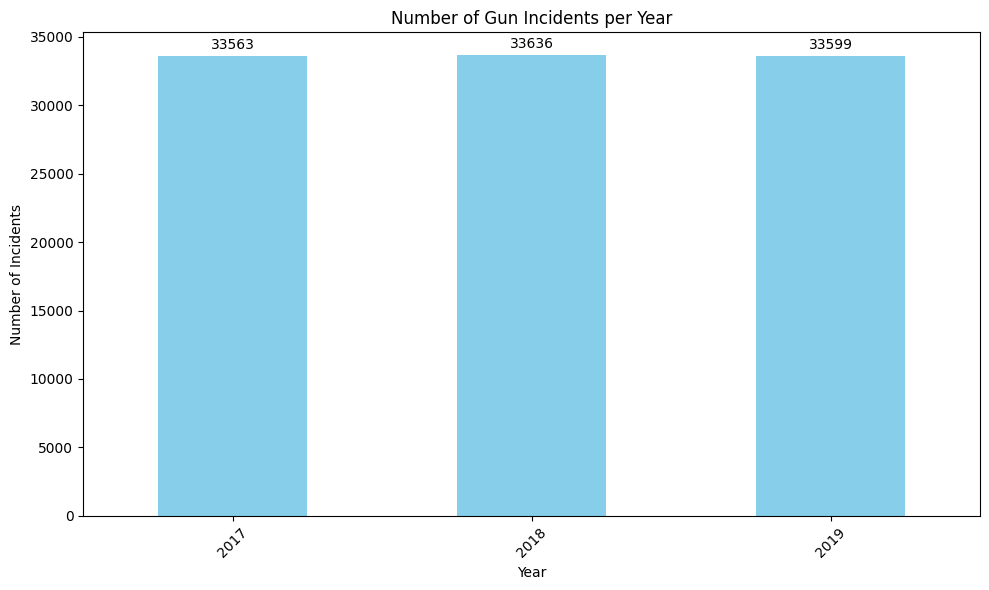

In [25]:
# Group by 'Year' and count the number of incidents
deaths_per_year = df.groupby('Year').size()

# Plot the bar chart
ax = deaths_per_year.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Add titles and labels
plt.title('Number of Gun Incidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)

# Annotate each bar with the count value
for i in ax.containers:
    ax.bar_label(i, label_type="edge", padding=3)

# Show the plot
plt.tight_layout()
plt.show()


From this plot, we can see that the number of incidents are almost constant every year.

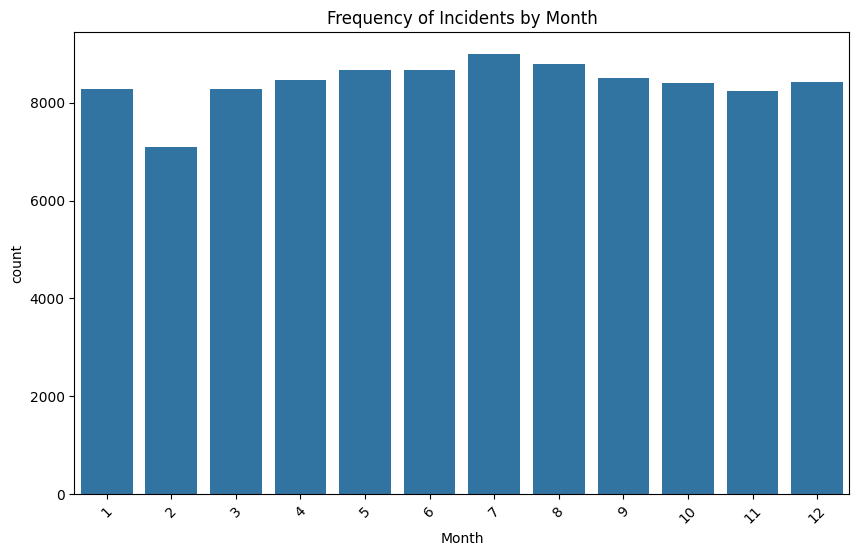

In [27]:
# Count plot for 'Month'
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df)
plt.title('Frequency of Incidents by Month')
plt.xticks(rotation=45)
plt.show()


                Year            Age
count  100798.000000  100780.000000
mean     2018.000357      44.857601
std         0.816278      19.496181
min      2017.000000       1.000000
25%      2017.000000      28.000000
50%      2018.000000      43.000000
75%      2019.000000      59.000000
max      2019.000000     108.000000


<Figure size 800x500 with 0 Axes>

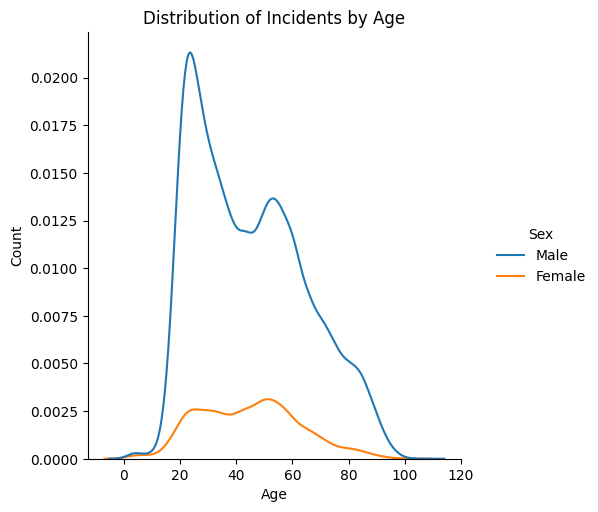

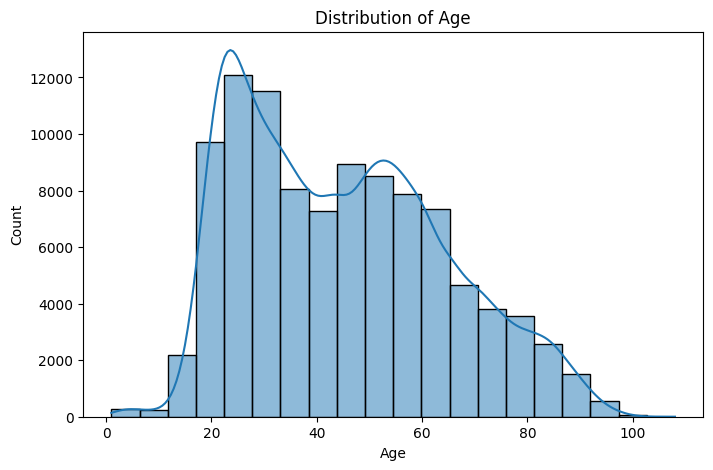

In [16]:
# Summary statistics for numerical columns
print(df[['Year', 'Age']].describe())
# Histogram for 'Year'
plt.figure(figsize=(8, 5))
sns.displot(data=df, x="Age", hue="Sex", kind="kde")  # Pass the 'x' argument explicitly and the DataFrame
plt.title('Distribution of Incidents by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability,but here , no need
plt.show()

# Histogram for 'Age'
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()


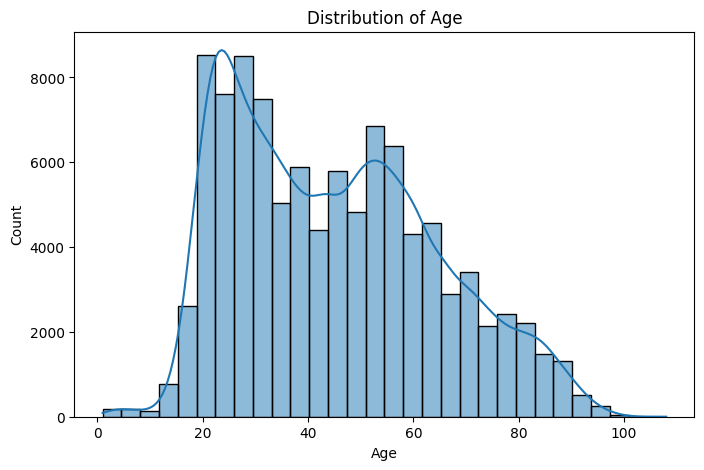

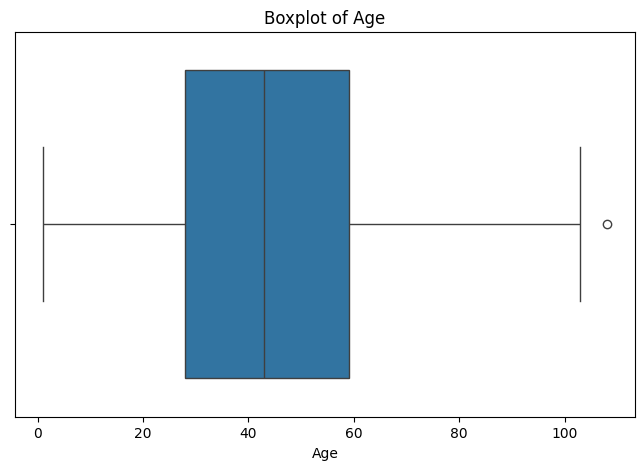

In [45]:
# Histogram for Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.show()

# Boxplot for Age
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()


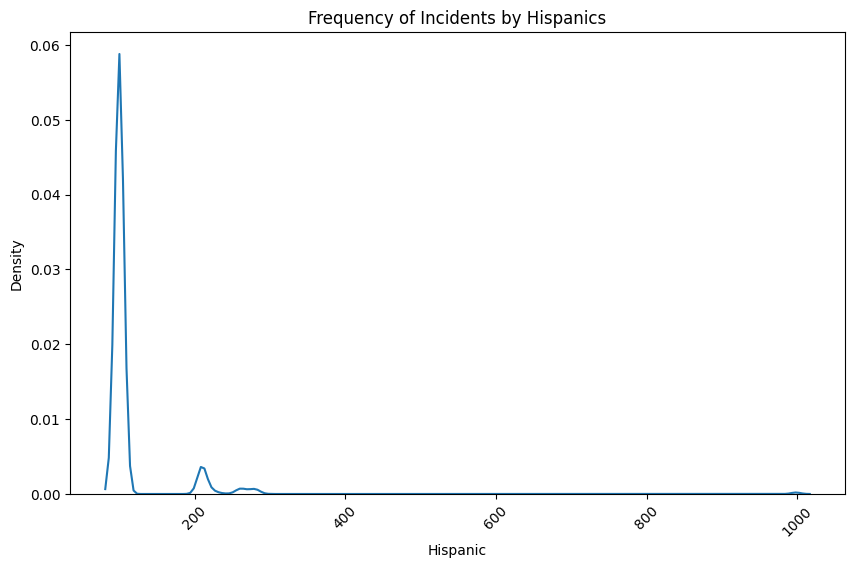

In [41]:
# Count plot for 'Hispanic'
plt.figure(figsize=(10, 6))
sns.kdeplot(x='Hispanic', data=df)
plt.title('Frequency of Incidents by Hispanics')
plt.xticks(rotation=45)
plt.show()

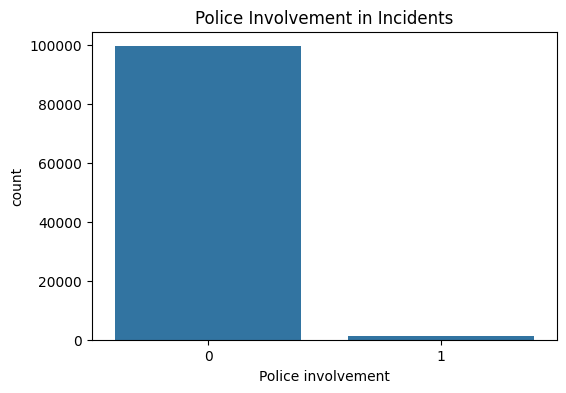

In [30]:

# Count plot for 'Police involvement'
plt.figure(figsize=(6, 4))
sns.countplot(x='Police involvement', data=df)
plt.title('Police Involvement in Incidents')
plt.show()


In [42]:
cat_cols = [col for col in df.columns if df[col].dtypes=="object"]
cat_cols

['Date', 'Reason', 'Education', 'Sex', 'Race', 'Place of incident']

Text(0.5, 1.0, 'Reason for Incident')

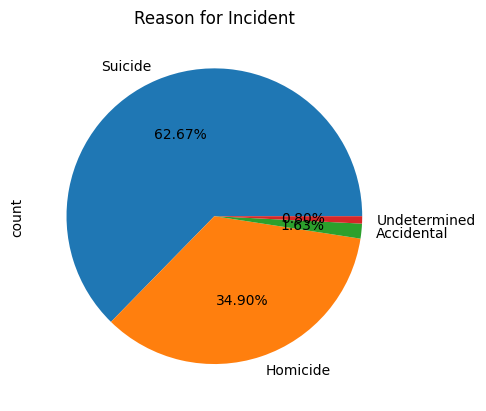

In [11]:
df['Reason'].value_counts().plot(kind="pie", autopct="%1.2f%%")
plt.title('Reason for Incident')

Suicide is the leading cause for a Gun incident, followed by Homicide.

In [17]:
# Data Analysis Example: Count the number of incidents per year
incidents_per_year = df['Year'].value_counts().sort_index()
print (df['Year'].value_counts().sort_index())


Year
2017    33563
2018    33636
2019    33599
Name: count, dtype: int64


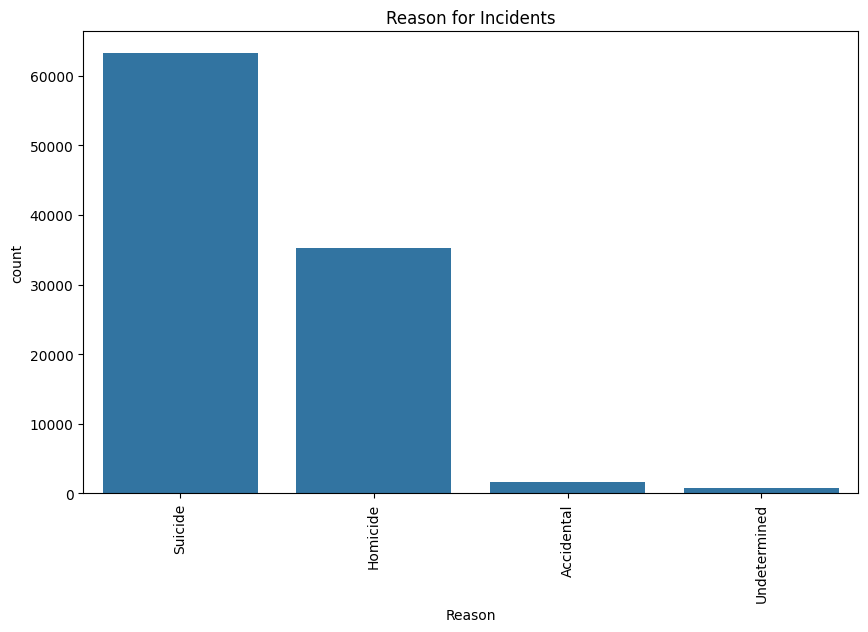

In [28]:
# Count plot for 'Reason'
plt.figure(figsize=(10, 6))
sns.countplot(x='Reason', data=df, order=df['Reason'].value_counts().index)
plt.title('Reason for Incidents')
plt.xticks(rotation=90)
plt.show()


Text(0.5, 1.0, 'Education')

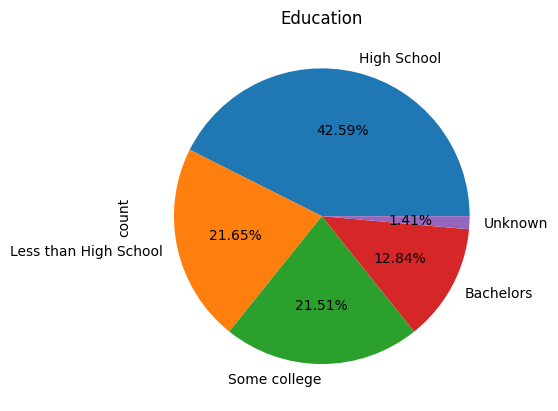

In [43]:
df['Education'].value_counts().plot(kind="pie", autopct="%1.2f%%")
plt.title('Education')

Majority of the people indulging into the gun use are of Less than or equal to High school level education only. So, education plays a very important role in lessening the number of Gun incidents.

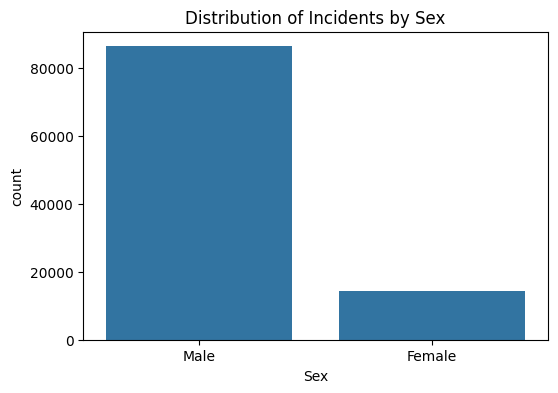

In [29]:

# Count plot for 'Sex'
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df)
plt.title('Distribution of Incidents by Sex')
plt.show()


### This plot shows that: Females are less involved in gun incidents than males.

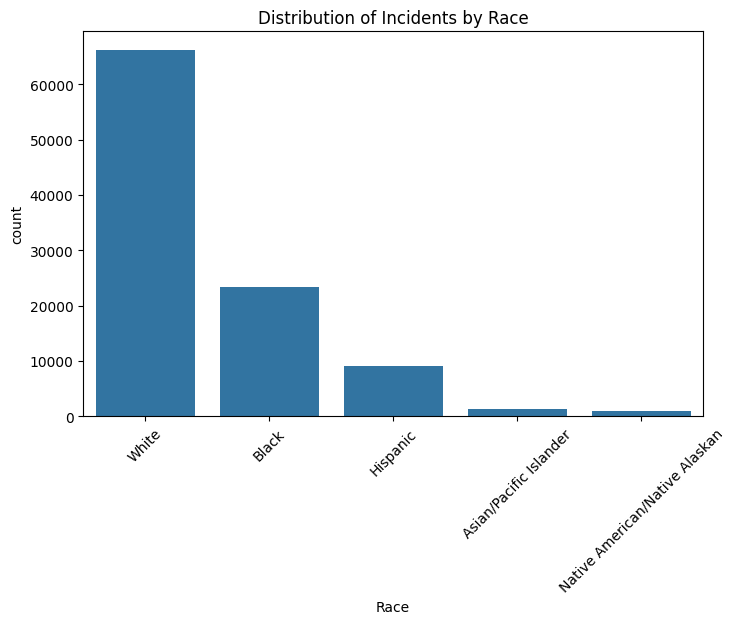

In [81]:

# Count plot for 'Race'
plt.figure(figsize=(8, 5))
sns.countplot(x='Race', data=df, order=df['Race'].value_counts().index)
plt.title('Distribution of Incidents by Race')
plt.xticks(rotation=45)
plt.show()


Whites are more indulged in gun incidents, followed by Blacks and then the rest.

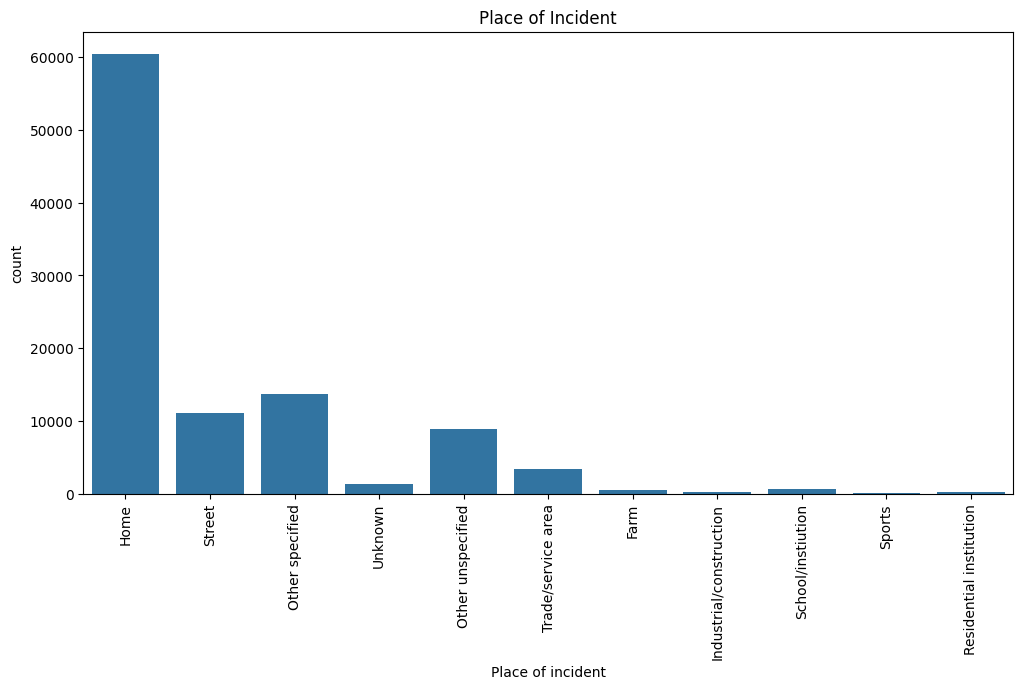

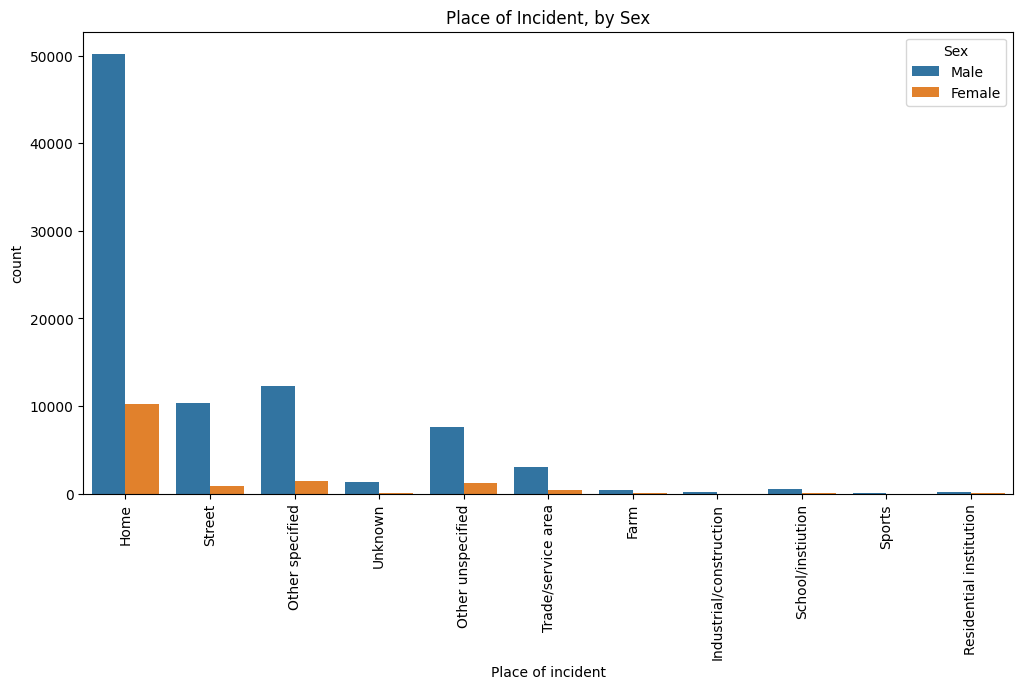

In [44]:
# Count plot for Place of Incident
plt.figure(figsize=(12, 6))
sns.countplot(x='Place of incident', data=df)
plt.title('Place of Incident')
plt.xticks(rotation=90)
plt.show()


# Count plot for Sex grouped by Place of Incident
plt.figure(figsize=(12, 6))
sns.countplot(x='Place of incident', hue='Sex', data=df)
plt.title('Place of Incident, by Sex')
plt.xticks(rotation=90)
plt.show()


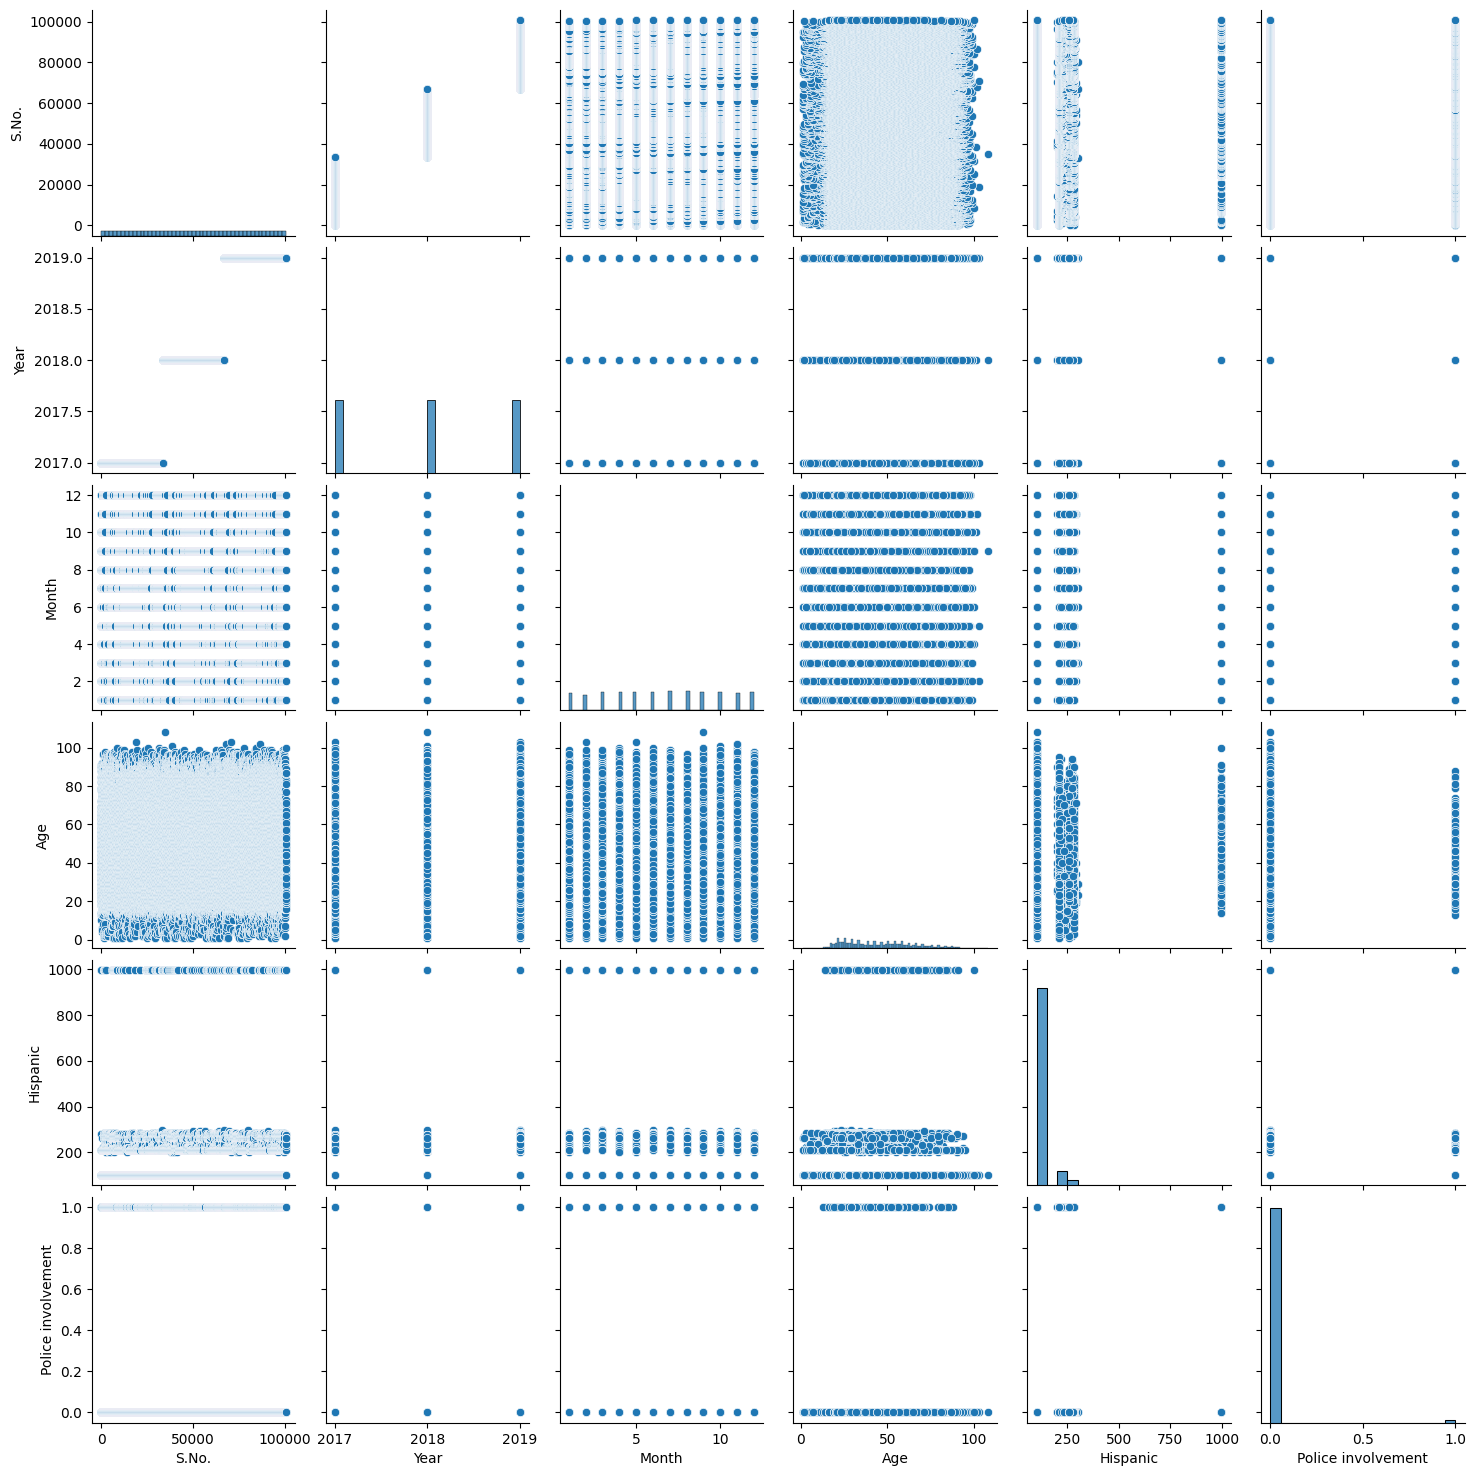

In [69]:
sns.pairplot(df)

In [32]:

# Pearson correlation
corr = df[['Year', 'Age']].corr()
print(corr)


          Year       Age
Year  1.000000  0.016662
Age   0.016662  1.000000


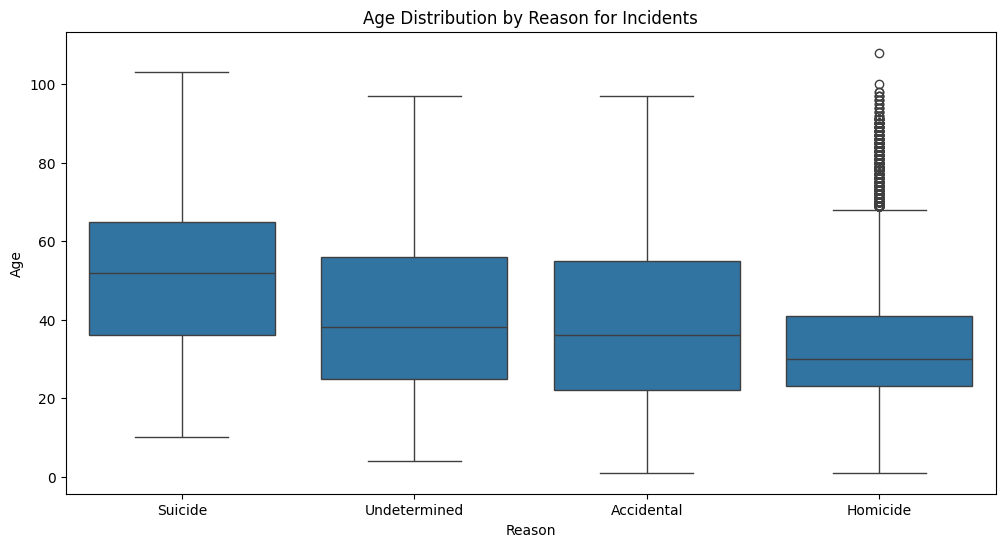

In [63]:
# Boxplot of Age grouped by Reason
plt.figure(figsize=(12, 6))
sns.boxplot(x='Reason', y='Age', data=df)
plt.title('Age Distribution by Reason for Incidents')
plt.xticks()
plt.show()


In [21]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'Age' column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to remove outliers
df_no_outliers = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# Print the size of the dataframe before and after removing outliers
print(f"Original data size: {df.shape[0]}")
print(f"Data size after removing outliers: {df_no_outliers.shape[0]}")

Original data size: 100798
Data size after removing outliers: 100779


In [35]:
# Check for outliers
# Option 1: Z-Score
z = np.abs(stats.zscore(df["Year"])) #using scipy
print(z)

# Option 2: Interquartile Range (IQR)
Q1 = df["Year"].quantile(0.25)
Q3 = df["Year"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print(df[(df["Year"] < lower) | (df["Year"] > upper)])

# Handle outliers
# Option 1: Drop outliers
df = df[(z < 3)]

# Option 2: Replace outliers with mean/median/mode
df["Year"][df["Year"] < lower] = lower
df["Year"][df["Year"] > upper] = upper

0         1.225517
1         1.225517
2         1.225517
3         1.225517
4         1.225517
            ...   
100793    1.224642
100794    1.224642
100795    1.224642
100796    1.224642
100797    1.224642
Name: Year, Length: 100798, dtype: float64
Empty DataFrame
Columns: [S.No., Year, Month, Date, Reason, Education, Sex, Age, Race, Hispanic, Place of incident, Police involvement, Day]
Index: []


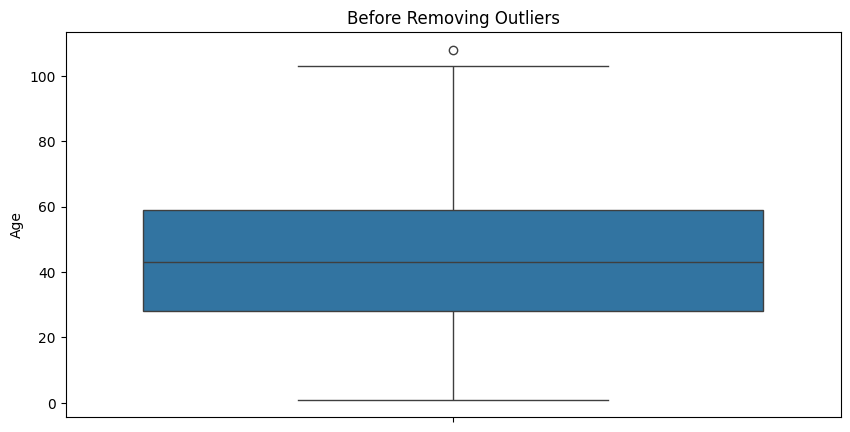

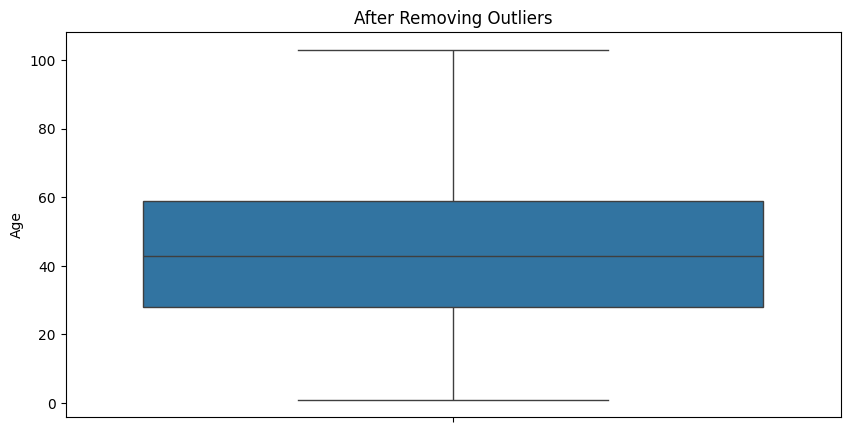

In [36]:
# Before removing outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df['Age'])
plt.title('Before Removing Outliers')
plt.show()

# After removing outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_no_outliers['Age'])
plt.title('After Removing Outliers')
plt.show()


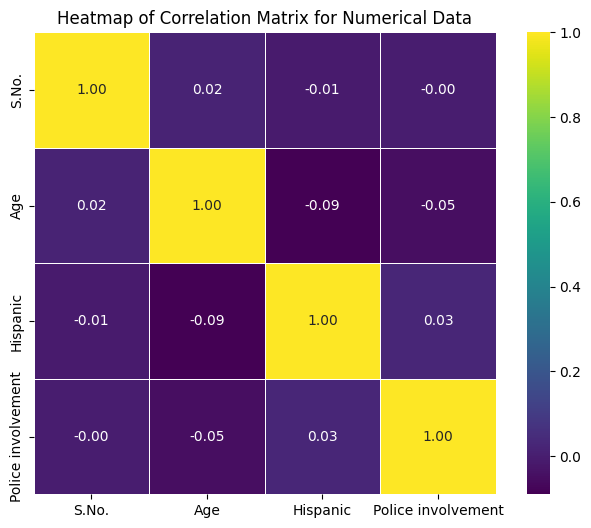

In [44]:
# Correlation matrix
corr_matrix = df[['Year', 'Age']].corr()

# Heatmap
numerical_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', square=True, cbar=True, linewidths=0.5)
plt.title('Heatmap of Correlation Matrix for Numerical Data')
plt.show()

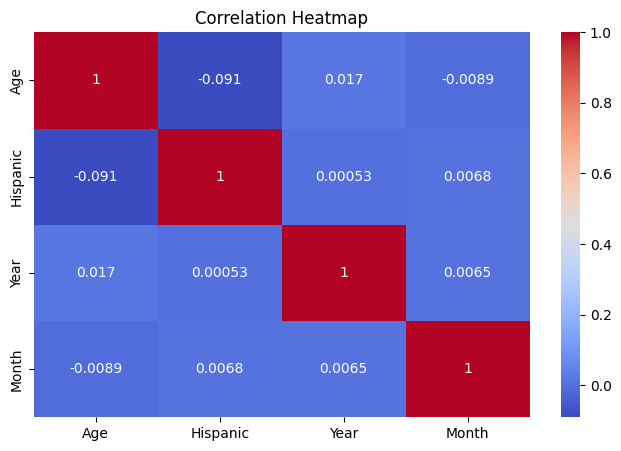

In [7]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Age', 'Hispanic', 'Year', 'Month']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Reason', ylabel='Age'>

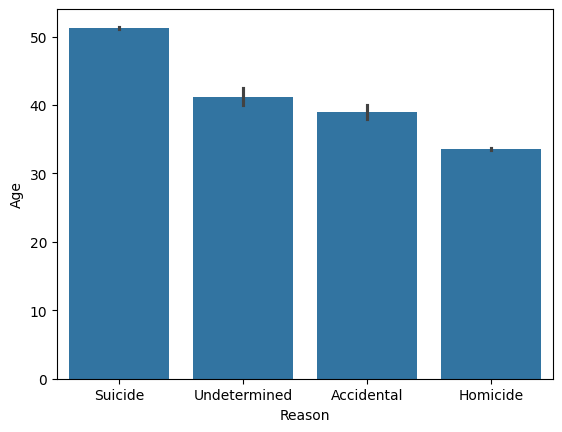

In [22]:
sns.barplot(data=df,x="Reason",y="Age")

<Axes: xlabel='Reason', ylabel='Age'>

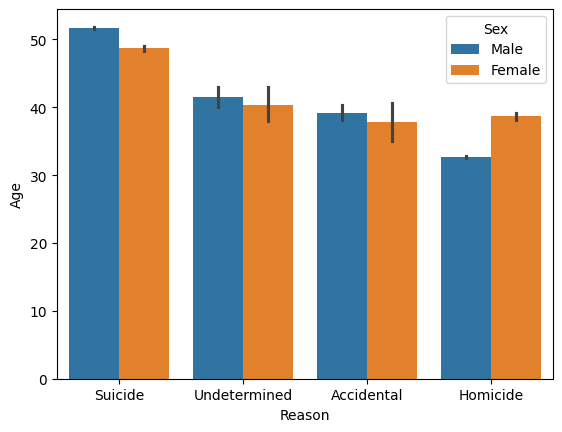

In [23]:
sns.barplot(data=df,x="Reason",y="Age", hue='Sex')

Old people are more likely to commit suicide as compared to a young person, while young people are more likely to indulge in a homicide.

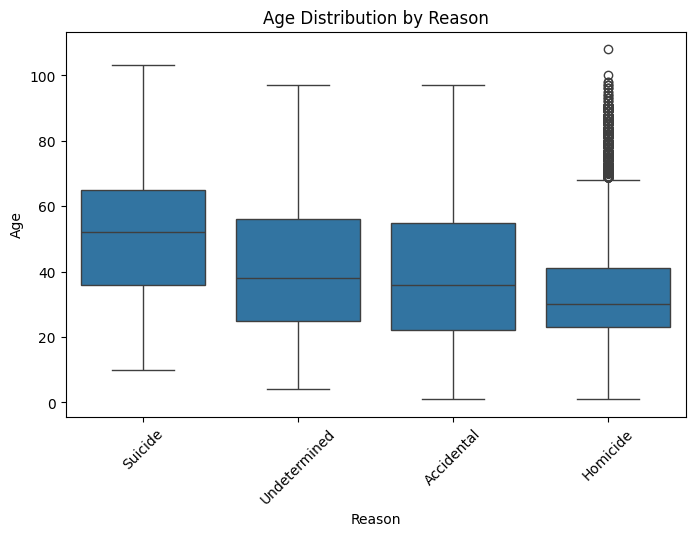

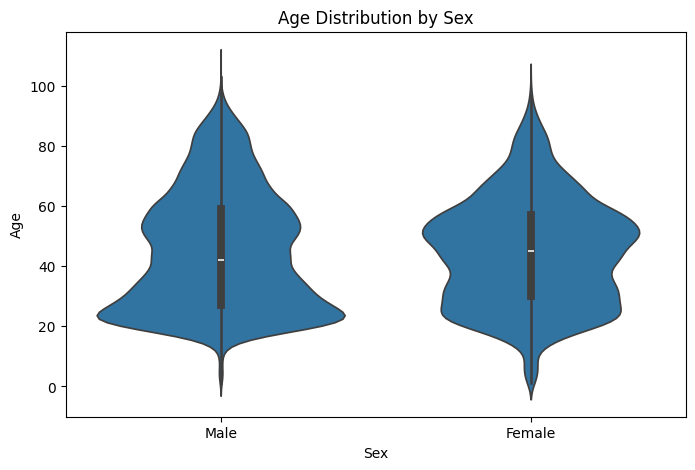

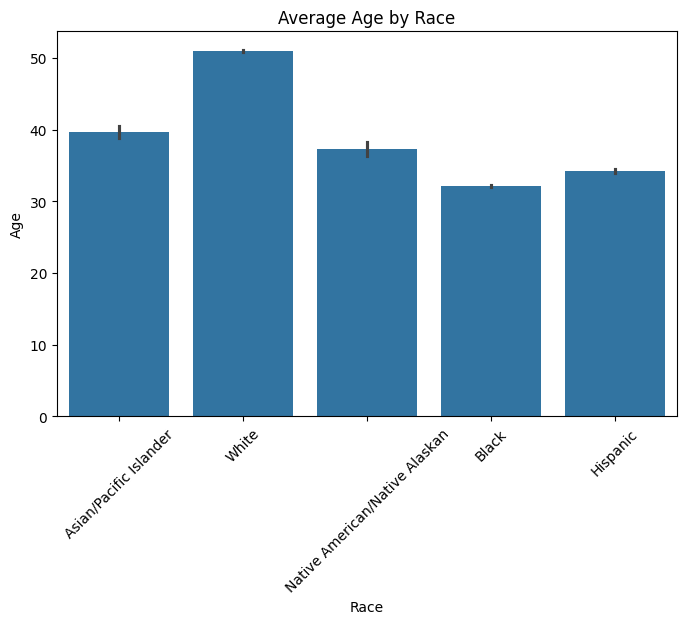

In [48]:
# Boxplot of Age by Reason
plt.figure(figsize=(8, 5))
sns.boxplot(x='Reason', y='Age', data=df)
plt.title('Age Distribution by Reason')
plt.xticks(rotation=45)
plt.show()

# Violin plot of Age by Sex
plt.figure(figsize=(8, 5))
sns.violinplot(x='Sex', y='Age', data=df)
plt.title('Age Distribution by Sex')
plt.show()

# Barplot for average Age by Race
plt.figure(figsize=(8, 5))
sns.barplot(x='Race', y='Age', data=df, estimator=lambda x: x.mean())
plt.title('Average Age by Race')
plt.xticks(rotation=45)
plt.show()


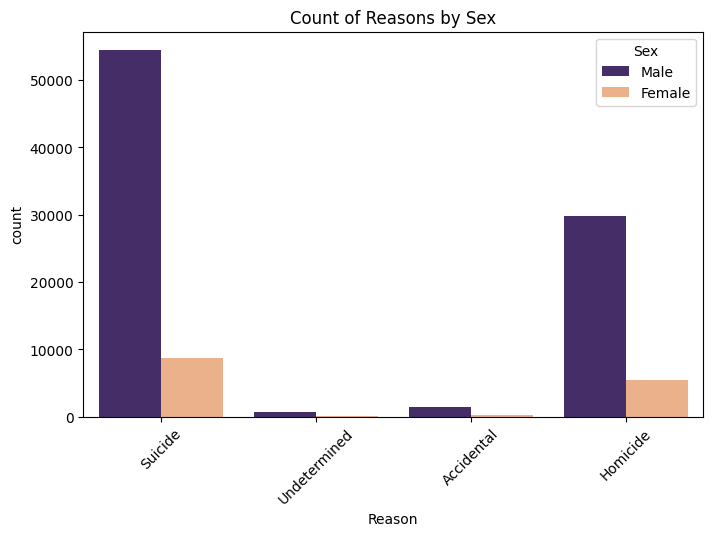

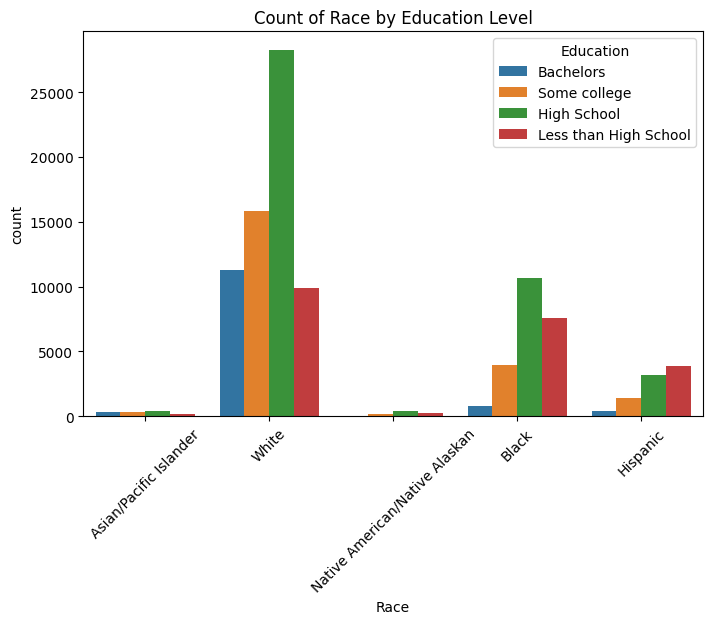

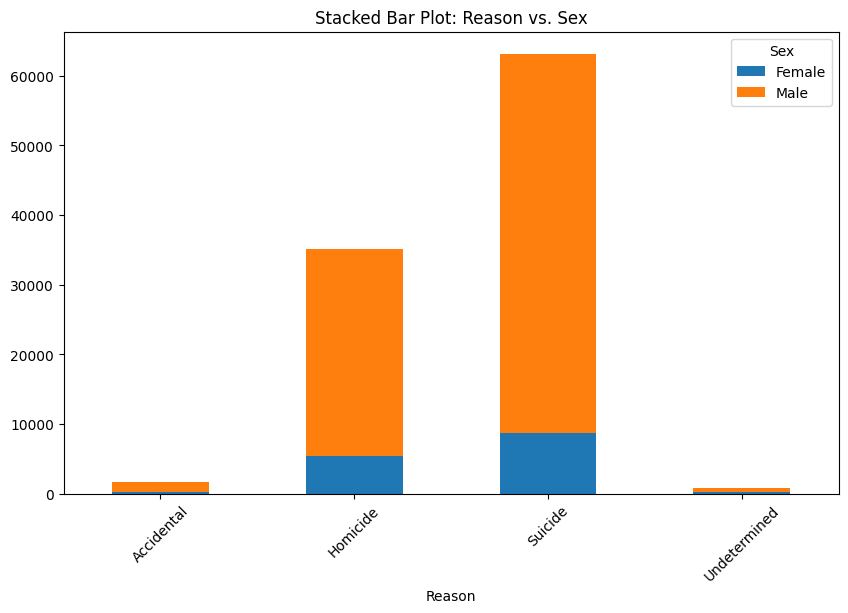

In [10]:
# Countplot of Reason by Sex
plt.figure(figsize=(8, 5))
sns.countplot(x='Reason', hue='Sex',palette=['#432371',"#FAAE7B"], data=df)
plt.title('Count of Reasons by Sex')
plt.xticks(rotation=45)
plt.show()

# Countplot of Race by Education
plt.figure(figsize=(8, 5))
sns.countplot(x='Race', hue='Education', data=df)
plt.title('Count of Race by Education Level')
plt.xticks(rotation=45)
plt.show()

# Heatmap of categorical variables
pd.crosstab(df['Reason'], df['Sex']).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot: Reason vs. Sex')
plt.xticks(rotation=45)
plt.show()


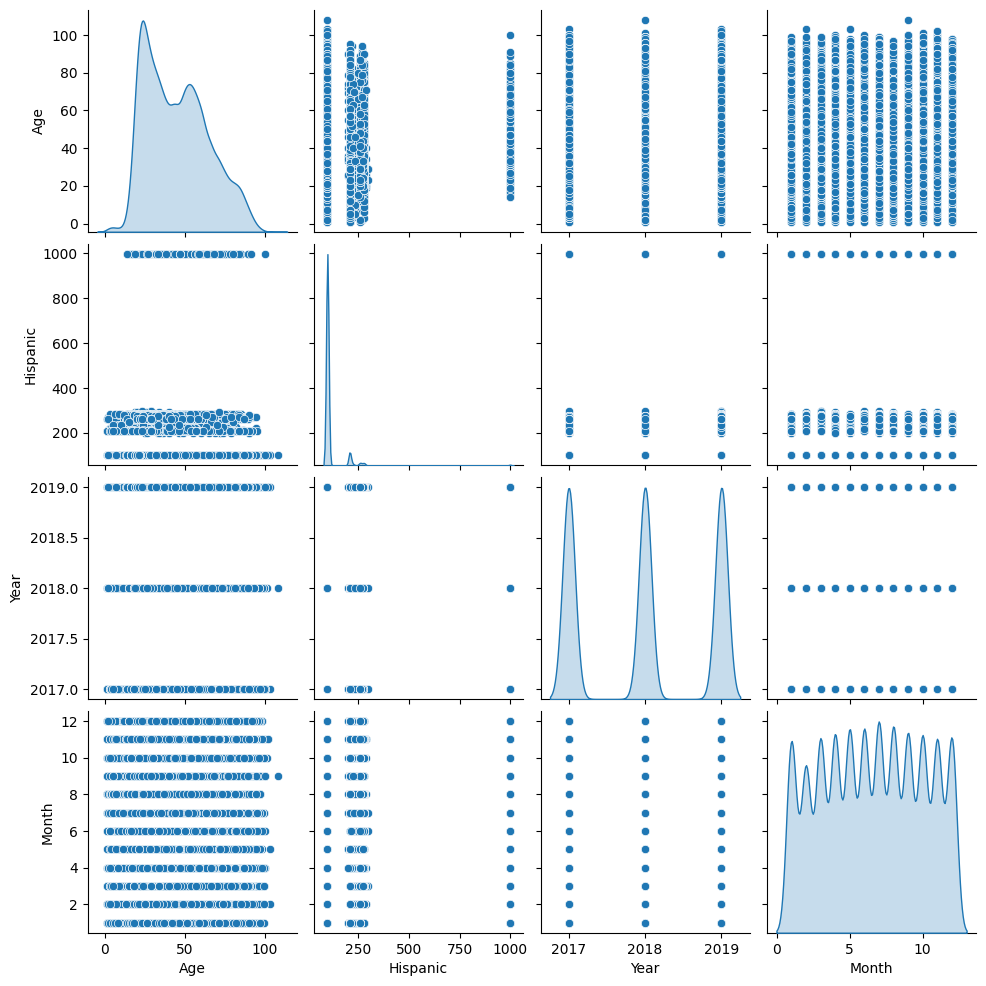

In [5]:
# Pairplot for multivariate analysis of numerical variables
sns.pairplot(df[['Age', 'Hispanic', 'Year', 'Month']], diag_kind='kde')
plt.show()


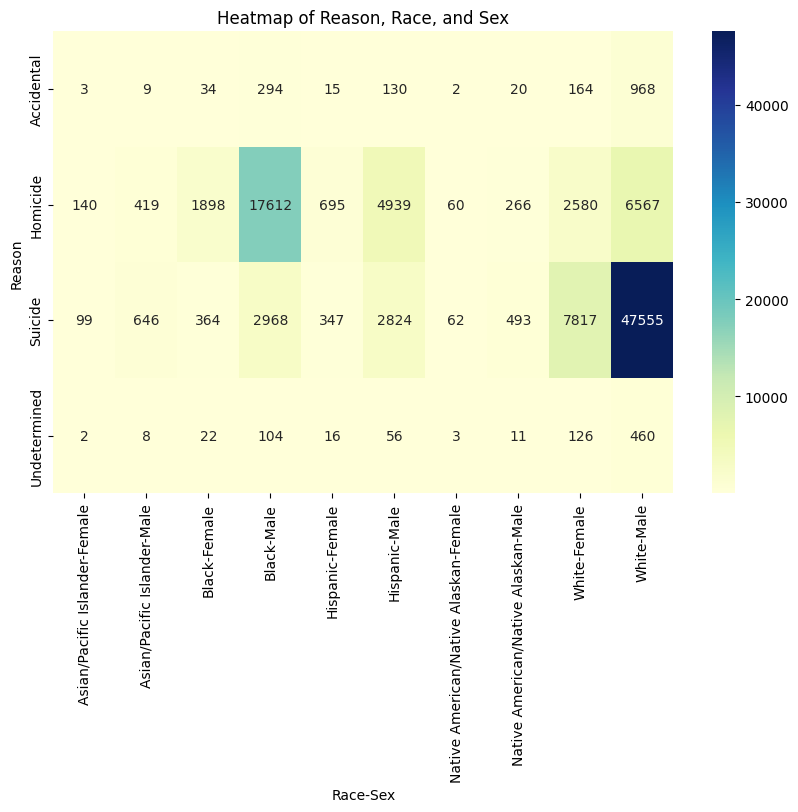

In [6]:
# Heatmap for Reason, Race, and Sex
pivot_table = pd.crosstab(index=df['Reason'], columns=[df['Race'], df['Sex']])
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Reason, Race, and Sex')
plt.show()


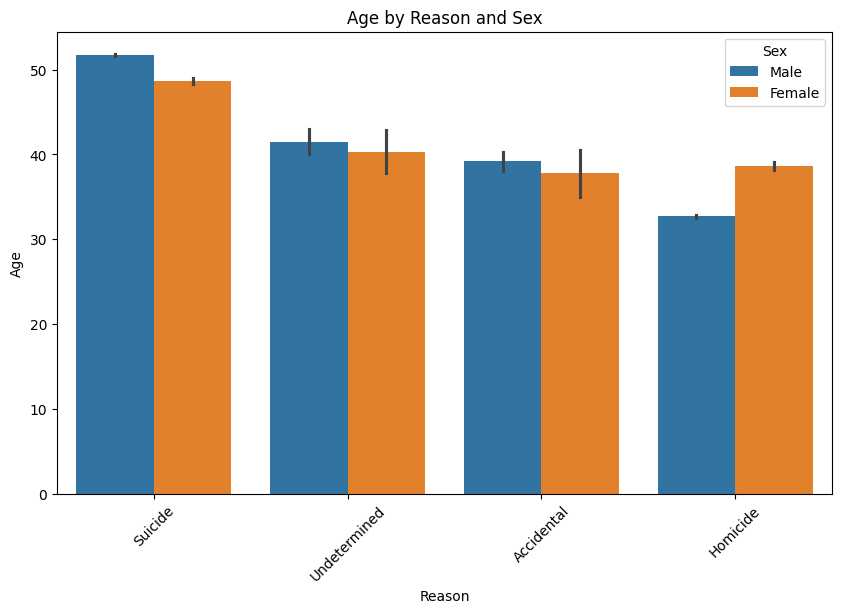

In [7]:

# Barplot of Age by Reason, Sex, and Race
plt.figure(figsize=(10, 6))
sns.barplot(x='Reason', y='Age', hue='Sex', data=df)
plt.title('Age by Reason and Sex')
plt.xticks(rotation=45)
plt.show()


Exploring time variables

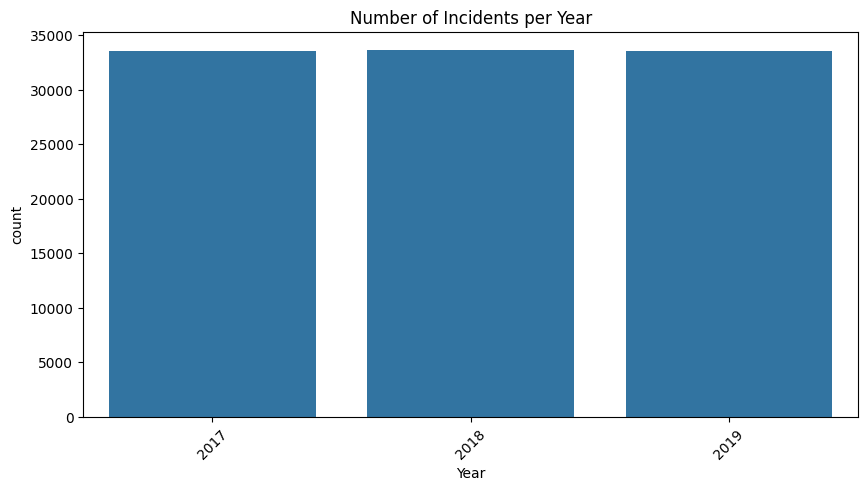

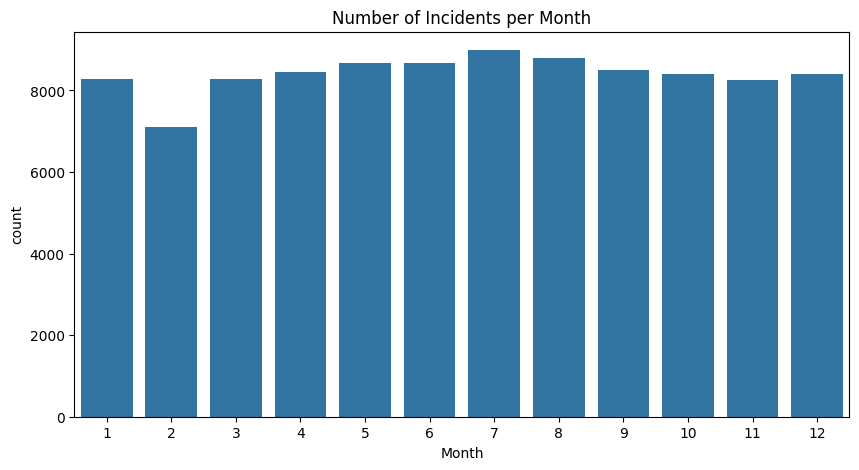

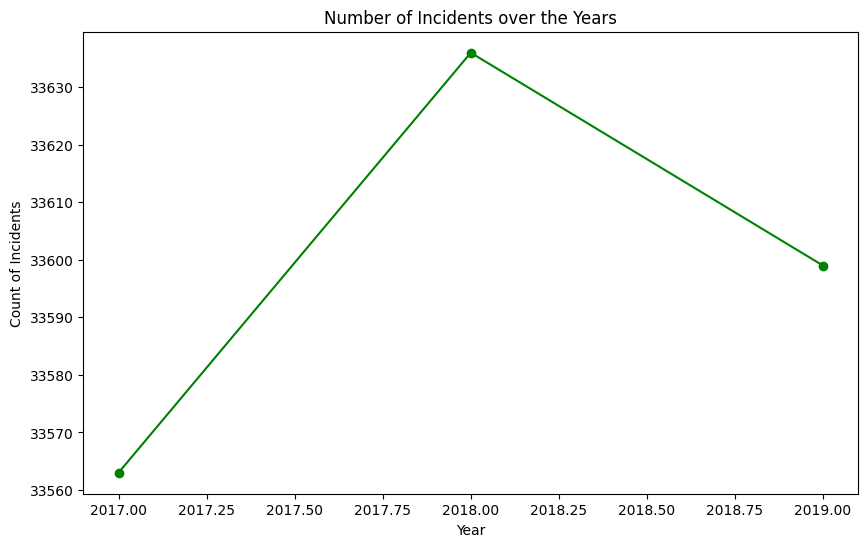

In [51]:
# Countplot for Year
plt.figure(figsize=(10, 5))
sns.countplot(x='Year', data=df)
plt.title('Number of Incidents per Year')
plt.xticks(rotation=45)
plt.show()

# Countplot for Month
plt.figure(figsize=(10, 5))
sns.countplot(x='Month', data=df)
plt.title('Number of Incidents per Month')
plt.show()

# Group by year to see the number of incidents over time
incidents_per_year = df.groupby('Year').size()
incidents_per_year.plot(kind='line', marker='o', figsize=(10, 6), color='green')
plt.title('Number of Incidents over the Years')
plt.ylabel('Count of Incidents')
plt.show()


In [40]:
from scipy.stats import chi2_contingency

# Chi-Square test for Sex and Police involvement
contingency_table = pd.crosstab(df['Sex'], df['Police involvement'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")


Chi-Square Statistic: 111.3185023996971
P-value: 5.038871899846848e-26


In [38]:
# Check for missing values in the 'Age' and 'Reason' columns
print(df[['Reason', 'Age']].isnull().sum())

# Check the size of each group to ensure there is enough data
for reason in df['Reason'].unique():
    group_size = df[df['Reason'] == reason]['Age'].dropna().shape[0]
    print(f"Group '{reason}' size: {group_size}")


Reason    0
Age       0
dtype: int64
Group 'Suicide' size: 63175
Group 'Undetermined' size: 808
Group 'Accidental' size: 1639
Group 'Homicide' size: 35176


In [21]:
print("Median of Age of the dead- ",df['Age'].median())

Median of Age of the dead-  43.0


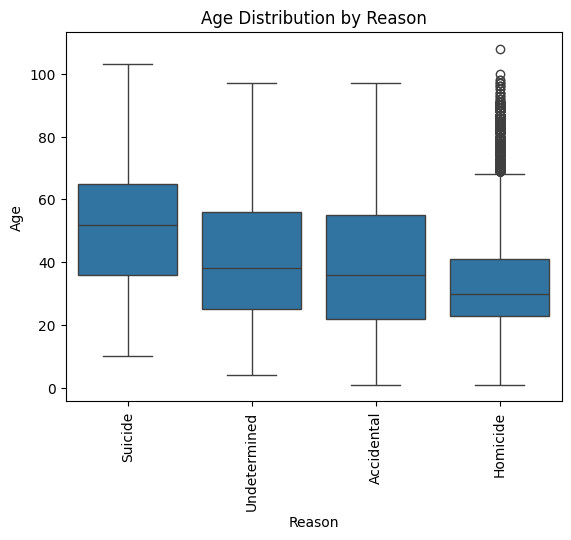

In [41]:
# Check for outliers in the 'Age' column using a boxplot
sns.boxplot(x='Reason', y='Age', data=df)
plt.xticks(rotation=90)
plt.title('Age Distribution by Reason')
plt.show()


In [65]:
# Drop rows with missing values in relevant columns before performing ANOVA
df = df.dropna(subset=['Education', 'Race'])

# Perform ANOVA for Age across Reason categories
anova_age_reason = stats.f_oneway(
    df[df['Reason'] == 'Accidental']['Age'].dropna(),
    df[df['Reason'] == 'Suicide']['Age'].dropna(),
    df[df['Reason'] == 'Homicide']['Age'].dropna()
)

print(f"ANOVA test for Age across Reason: F-statistic = {anova_age_reason.statistic}, p-value = {anova_age_reason.pvalue}")


# Perform ANOVA for Age across Sex categories
anova_age_sex = stats.f_oneway(
    df[df['Sex'] == 'Male']['Age'].dropna(),
    df[df['Sex'] == 'Female']['Age'].dropna()
)

print(f"ANOVA test for Age across Sex: F-statistic = {anova_age_sex.statistic}, p-value = {anova_age_sex.pvalue}")


# Perform ANOVA for Age across Police Involvement categories
anova_age_police = stats.f_oneway(
    df[df['Police involvement'] == 1]['Age'].dropna(),
    df[df['Police involvement'] == 0]['Age'].dropna()
)

print(f"ANOVA test for Age across Police Involvement: F-statistic = {anova_age_police.statistic}, p-value = {anova_age_police.pvalue}")


# Perform ANOVA for Hispanic across Reason categories
anova_hispanic_reason = stats.f_oneway(
    df[df['Reason'] == 'Accidental']['Hispanic'].dropna(),
    df[df['Reason'] == 'Suicide']['Hispanic'].dropna(),
    df[df['Reason'] == 'Homicide']['Hispanic'].dropna()
)

print(f"ANOVA test for Hispanic across Reason: F-statistic = {anova_hispanic_reason.statistic}, p-value = {anova_hispanic_reason.pvalue}")


# Perform ANOVA for Hispanic across Sex categories
anova_hispanic_sex = stats.f_oneway(
    df[df['Sex'] == 'Male']['Hispanic'].dropna(),
    df[df['Sex'] == 'Female']['Hispanic'].dropna()
)

print(f"ANOVA test for Hispanic across Sex: F-statistic = {anova_hispanic_sex.statistic}, p-value = {anova_hispanic_sex.pvalue}")


# Perform ANOVA for Hispanic across Police Involvement categories
anova_hispanic_police = stats.f_oneway(
    df[df['Police involvement'] == 1]['Hispanic'].dropna(),
    df[df['Police involvement'] == 0]['Hispanic'].dropna()
)

print(f"ANOVA test for Hispanic across Police Involvement: F-statistic = {anova_hispanic_police.statistic}, p-value = {anova_hispanic_police.pvalue}")

ANOVA test for Age across Reason: F-statistic = 11533.97846706498, p-value = 0.0
ANOVA test for Age across Sex: F-statistic = 1.1726891522591252, p-value = 0.2788519707999178
ANOVA test for Age across Police Involvement: F-statistic = 228.4732076722023, p-value = 1.462005145024616e-51
ANOVA test for Hispanic across Reason: F-statistic = 548.1084746841304, p-value = 1.7986385371247013e-237
ANOVA test for Hispanic across Sex: F-statistic = 21.52157878503017, p-value = 3.5030837384005916e-06
ANOVA test for Hispanic across Police Involvement: F-statistic = 71.14657364292917, p-value = 3.359539303346908e-17


In [20]:
# Independent T-test between two groups: 'Sex' (Male vs Female)
t_stat, p_val = stats.ttest_ind(
    df[df['Sex'] == 'Male']['Age'].dropna(),
    df[df['Sex'] == 'Female']['Age'].dropna()
)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 1.0825621721892287
P-value: 0.27900539553785436


In [8]:
# Save the cleaned dataset to a new CSV file if needed
df.to_csv('cleaned_guns_incident_data.csv', index=False)


### **1. Univariate Analysis**

#### **Numerical Variables:**
- **Age:**
  - The age distribution of the individuals involved in gun incidents seems to follow a normal distribution, with a significant number of incidents involving younger people, particularly in the 18-30 age range.
  - Outliers were identified in the age column, particularly individuals older than 70, which could suggest involvement in specific types of incidents such as accidents or homicides.

#### **Categorical Variables:**
- **Reason:**
  - The most common reasons for gun-related incidents are **homicides** and **suicides**, with accidental deaths accounting for a smaller proportion.
  
- **Sex:**
  - Males are disproportionately involved in gun incidents compared to females. This trend is consistent across various types of incidents (homicide, suicide, and accidents).

- **Race:**
  - Certain racial groups (like **White** and **Black/African American**) are more represented in the dataset, likely corresponding to larger population sizes or specific socio-economic factors tied to gun violence in the U.S.

---

### **2. Bivariate Analysis**

#### **Numerical vs. Numerical:**
- **Age vs. Hispanic Origin:**
  - A scatter plot between `Age` and `Hispanic` did not reveal any strong correlation, indicating that age distribution among Hispanic and non-Hispanic groups is similar.

#### **Numerical vs. Categorical:**
- **Age vs. Reason:**
  - Suicides tend to occur among older individuals, while homicides are more frequent in younger age groups.
  - Old people are more likely to commit suicide as compared to a young person, while young people are more likely to indulge in a homicide, which can be linked to the fact that the majority of the people indulging into the gun use are of Less than or equal to High school level education only. So ducation play a huge role in limiting the incidents.
  - Accidental deaths due to gun incidents appear to be more evenly distributed across ages but slightly skew toward younger individuals.

- **Age vs. Sex:**
  - While the age distribution is similar for both males and females, the number of incidents involving males is much higher. Young males (particularly between 18-30 years) are disproportionately represented in gun-related homicides.

#### **Categorical vs. Categorical:**
- **Reason vs. Sex:**
  - Suicides are more common among males, and this trend is very stark. Homicides also involve a higher proportion of males, but the gap is smaller compared to suicides.

- **Reason vs. Race:**
  - A higher percentage of **Black/African American** individuals are involved in homicides compared to **White** individuals, whereas suicide rates are higher among the **White** population. This could reflect socio-economic disparities affecting different racial communities.

---

### **3. Multivariate Analysis**

#### **Race, Sex, and Reason:**
- **Heatmaps and Barplots** show that:
  - **Black males** are disproportionately involved in homicides, while **White males** are more frequently involved in suicides. This suggests racial and gender-specific trends in gun-related incidents, possibly tied to societal factors like poverty, mental health, and access to firearms.
  
#### **Age, Reason, and Sex:**
- **Barplot of Age by Reason and Sex:**
  - FEMALES are less involved in gun incidents as compared to males.
  Males, especially in the age range of 20-30, dominate the incidents involving homicides. Suicides, though less frequent in the younger age group, are much more prevalent among older males.
  
---

### **Final Observations & Insights:**

1. **Demographic Trends:**
   - Males, particularly young males between the ages of 18-30, are disproportionately involved in gun-related incidents, with a strong bias toward homicides in this group.
   - Suicides are more common among older males, especially among the White population.
   - Gun-related homicides disproportionately affect the Black/African American community, which suggests deeper socio-economic disparities or higher exposure to violent environments.

2. **Geographical Factors:**
   - If `Place of incident` is analyzed, 'Home' has a higher prevalence of gun incidents.
  
3. **Temporal Patterns:**
   - Gun-related incidents seems to be almost constant over the years, with noticeable spikes around certain years. Seasonality plays a role, with incidents peaking during the summer months.

4. **Education:**
   - Lower levels of education seem correlated with a higher occurrence of gun-related incidents, particularly homicides. Education may serve as a protective factor against gun violence.

5. **Police Involvement:**
   - In many incidents, police involvement seems to be a common outcome, but the type of involvement could be further explored to understand whether the police were involved as responders to crimes or in cases of accidents.
